# Tugas Besar II4042 Kecerdasan Buatan untuk Bisnis

# Pendahuluan

# Lihat Isi Data

In [107]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss 

In [108]:
df = pd.read_csv('data/heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [109]:
# get column names
col_names = df.columns
col_names

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [110]:
# get column data types
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [111]:
# get number of rows and columns
df.shape

(246022, 40)

In [112]:
# get a statistical summary of the data
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [113]:
# check for any null columns
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

Since there are no empty rows in the dataset, we don't have to deal with any missing values.

# Exploratory Data Analysis

In [114]:
# get categorical columns and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [115]:
cat_cols

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [116]:
# removing certain cols that aren't related to visualize
remove_from_cat_cols = [
 'State',
 'LastCheckupTime',
 'RemovedTeeth',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos'
]

viz_cols = [val for val in cat_cols if val not in remove_from_cat_cols]
viz_cols

['Sex',
 'GeneralHealth',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting']

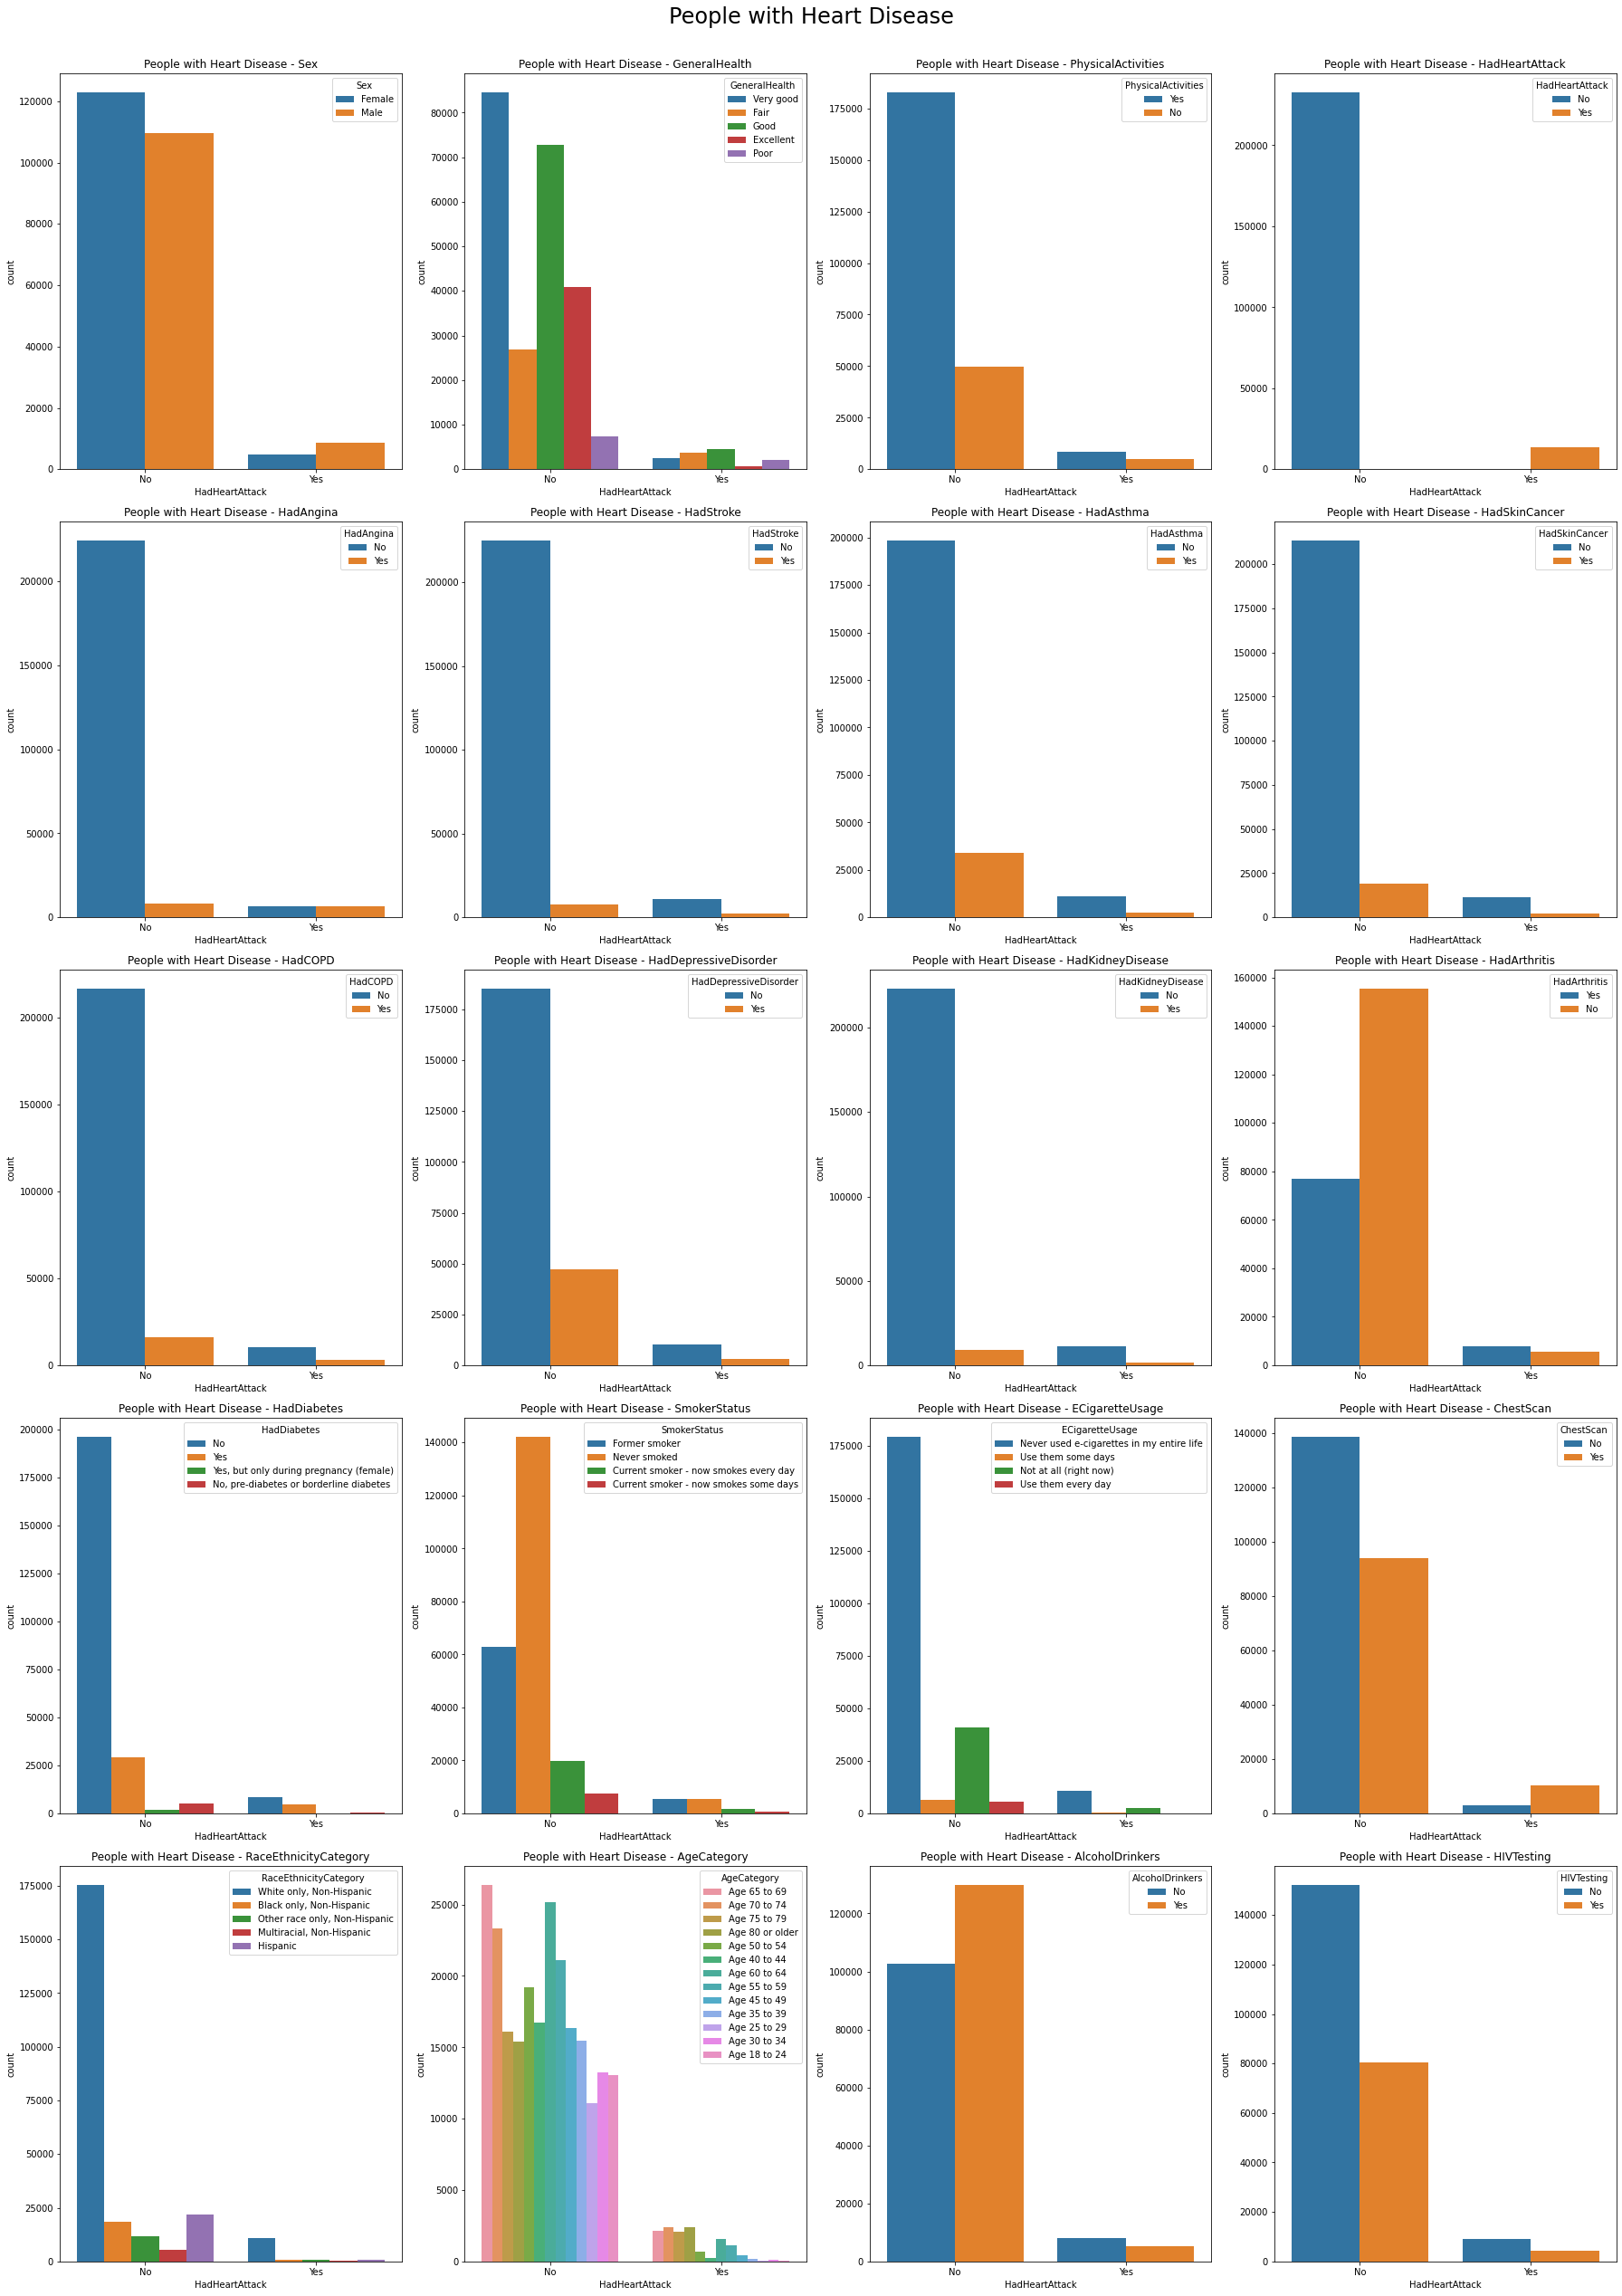

In [117]:
# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 35))
fig.suptitle("People with Heart Disease", y=1.005, fontsize=24)

# Iterate over columns and create countplots
for i, col in enumerate(viz_cols):
    ax = axes[i // 4, i % 4]
    sns.countplot(data=df, x='HadHeartAttack', hue=col, ax=ax)
    ax.legend(title=col)
    ax.set_title(f'People with Heart Disease - {col}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Splitting the Data

In [118]:
from sklearn.model_selection import train_test_split

X = df.drop(['State', 'HadHeartAttack'], axis=1)
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [119]:
X_train.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
108770,Male,Very good,0.0,1.0,Within past 2 years (1 year but less than 2 ye...,Yes,9.0,None of them,No,No,...,1.78,65.77,20.81,Yes,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No
139888,Male,Very good,7.0,1.0,Within past year (anytime less than 12 months ...,Yes,3.0,1 to 5,No,No,...,1.93,99.79,26.78,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
78834,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,All,No,No,...,1.73,86.18,28.89,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
204500,Female,Very good,1.0,28.0,Within past year (anytime less than 12 months ...,No,5.0,All,No,No,...,1.75,108.86,35.44,No,Yes,Yes,No,"Yes, received Tdap",Yes,No
169662,Male,Very good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,Yes,Yes,...,1.78,99.79,31.57,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...


In [120]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (196817, 38)
X_test shape: (49205, 38)


# Encoding the Data

In [121]:
mapping = {'Yes': 1, 'No': 0}
questions_penyakit = X_train.filter(like='Had', axis=1)

for col in questions_penyakit.columns:
    X_train[col] = X_train[col].map(mapping).fillna(-1)
    X_test[col] = X_test[col].map(mapping).fillna(-1)

In [122]:
X_train.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
108770,Male,Very good,0.0,1.0,Within past 2 years (1 year but less than 2 ye...,Yes,9.0,None of them,0,0,...,1.78,65.77,20.81,Yes,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No
139888,Male,Very good,7.0,1.0,Within past year (anytime less than 12 months ...,Yes,3.0,1 to 5,0,0,...,1.93,99.79,26.78,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
78834,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,All,0,0,...,1.73,86.18,28.89,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
204500,Female,Very good,1.0,28.0,Within past year (anytime less than 12 months ...,No,5.0,All,0,0,...,1.75,108.86,35.44,No,Yes,Yes,No,"Yes, received Tdap",Yes,No
169662,Male,Very good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,1,1,...,1.78,99.79,31.57,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...


In [123]:
import category_encoders as ce
ce_columns = ['RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos', 'Sex']

# Create the OneHotEncoder instance
encoder = ce.OneHotEncoder(cols=ce_columns, use_cat_names=True)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data using the fitted encoder
X_test_encoded = encoder.transform(X_test)

In [124]:
X_train = X_train_encoded
X_test = X_test_encoded

In [125]:
# mapping AgeCategory
mapping = {'Age 18 to 24': 1, 'Age 25 to 29': 2, 'Age 30 to 34':3, 'Age 35 to 39':4,
           'Age 40 to 44': 5, 'Age 45 to 49': 6, 'Age 50 to 54':7, 'Age 55 to 59':8,
           'Age 60 to 64':9, 'Age 65 to 69': 10,  'Age 70 to 74':11,  'Age 75 to 79':12,
           'Age 80 or older':13 }
X_train['AgeCategory'] = X_train['AgeCategory'].map(mapping)
X_test['AgeCategory'] = X_test['AgeCategory'].map(mapping)

In [126]:
# mapping ECigaretteUsage
mapping = {'Never used e-cigarettes in my entire life': 4, 'Not at all (right now)': 3,
 'Use them some days':2,  'Use them every day':1}
X_train['ECigaretteUsage'] = X_train['ECigaretteUsage'].map(mapping)
X_test['ECigaretteUsage'] = X_test['ECigaretteUsage'].map(mapping)

In [127]:
# mapping removedTeeth
mapping = {'None of them': 4, '1 to 5': 3, 'All': 1, '6 or more, but not all': 2}
X_train['RemovedTeeth'] = X_train['RemovedTeeth'].map(mapping)
X_test['RemovedTeeth'] = X_test['RemovedTeeth'].map(mapping)

In [128]:
# mapping last checkup time
mapping = {'Within past 2 years (1 year but less than 2 years ago)': 3,
 'Within past year (anytime less than 12 months ago)': 4,
 'Within past 5 years (2 years but less than 5 years ago)': 2,
 '5 or more years ago': 1}
X_train['LastCheckupTime'] = X_train['LastCheckupTime'].map(mapping)
X_test['LastCheckupTime'] = X_test['LastCheckupTime'].map(mapping)

In [129]:
# mapping generalhealth
mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
X_train['GeneralHealth'] = X_train['GeneralHealth'].map(mapping)
X_test['GeneralHealth'] = X_test['GeneralHealth'].map(mapping)

In [130]:
# mapping smoker
mapping = {'Never smoked': 4, 'Former smoker': 3, 'Current smoker - now smokes some days': 2, 'Current smoker - now smokes every day': 1}
X_train['SmokerStatus'] = X_train['SmokerStatus'].map(mapping)
X_test['SmokerStatus'] = X_test['SmokerStatus'].map(mapping)

In [131]:
categorical_columns_with_two_values = []

for column in X_train.columns:
    if X_train[column].nunique() == 2 and X_train[column].dtype == 'object':
        categorical_columns_with_two_values.append(column)

# Display the result
print(categorical_columns_with_two_values)

['PhysicalActivities', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']


In [132]:
mapping = {'Yes': 1, 'No': 0}

for col in categorical_columns_with_two_values:
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [133]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (196817, 48)
X_test shape: (49205, 48)


# See the Most Important Features with Information Gain

In [134]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

HadAngina                                                                      0.047773
PhysicalActivities                                                             0.041837
RaceEthnicityCategory_White only, Non-Hispanic                                 0.037248
CovidPos_No                                                                    0.036928
AlcoholDrinkers                                                                0.036677
LastCheckupTime                                                                0.034248
ChestScan                                                                      0.034177
Sex_Female                                                                     0.033983
RemovedTeeth                                                                   0.033672
FluVaxLast12                                                                   0.030797
SmokerStatus                                                                   0.030386
Sex_Male                        

## Selecting the top XX features

In [135]:
sorted_mutual_info = mutual_info.sort_values(ascending=False)

# get the ones with more than 0.001
selected_features = mutual_info[mutual_info > 0.001].index

# Subset your feature matrix with the top 10 columns
X_train_selected = X_train[selected_features]
X_train = X_train_selected

X_test_selected = X_test[selected_features]
X_test = X_test_selected

# Oversampling and Undersampling

We can see that the data is heavily unbalanced. Thus, we will do oversampling and undersampling.

In [136]:
print("Before OverSampling & Undersampling, counts of label 'Yes': {}".format(sum(y_train == 'Yes'))) 
print("Before OverSampling & Undersampling, counts of label 'No': {} \n".format(sum(y_train == 'No'))) 

# apply oversampling
oversample = RandomOverSampler(sampling_strategy=0.75)
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel()) 
  
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_res == 'Yes'))) 
print("After OverSampling, counts of label 'No': {}\n".format(sum(y_train_res ==  'No'))) 

# apply near miss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train_res, y_train_res.ravel()) 

print("After OverSampling & Undersampling, counts of label 'Yes': {}".format(sum(y_train_miss == 'Yes'))) 
print("After OverSampling & Undersampling, counts of label 'No': {}".format(sum(y_train_miss ==  'No'))) 

Before OverSampling & Undersampling, counts of label 'Yes': 10758
Before OverSampling & Undersampling, counts of label 'No': 186059 

After OverSampling, counts of label 'Yes': 139544
After OverSampling, counts of label 'No': 186059

After OverSampling & Undersampling, counts of label 'Yes': 139544
After OverSampling & Undersampling, counts of label 'No': 139544


In [137]:
count_x_train_miss = X_train_miss.shape[0]
print("Number of rows in X_train:", count_x_train_miss)

Number of rows in X_train: 279088


# Model 1: Decision Tree

In [138]:
# importing stuff needed for the decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [139]:
X_train = X_train_miss
y_train = y_train_miss

In [140]:
# create the decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=5)
clf = clf.fit(X_train,y_train)
clf_y_pred = clf.predict(X_test)

## Accuracy Score

In [141]:
print("Accuracy:", metrics.accuracy_score(y_test, clf_y_pred))

Accuracy: 0.9010059953256783


## Compare the train-set and test-set accuracy

In [142]:
clf_y_pred_train = clf.predict(X_train)
clf_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [143]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, clf_y_pred_train))

Training-set accuracy score: 1.0


In [144]:
print('Training set score:', clf.score(X_train, y_train))
print('Test set score:', clf.score(X_test, y_test))

Training set score: 1.0
Test set score: 0.9010059953256783


## Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix

clf_cm = confusion_matrix(y_test, clf_y_pred)

print('Confusion matrix\n\n', clf_cm)
print('\nTrue Positives(TP) =', clf_cm[0,0])
print('True Negatives(TN) =', clf_cm[1,1])
print('False Positives(FP) =', clf_cm[0,1])
print('False Negatives(FN) =', clf_cm[1,0])

Confusion matrix

 [[43439  3089]
 [ 1782   895]]

True Positives(TP) = 43439
True Negatives(TN) = 895
False Positives(FP) = 3089
False Negatives(FN) = 1782


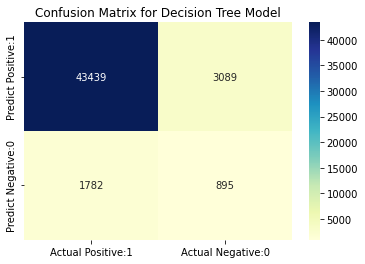

In [146]:
# visualize confusion matrix with seaborn heatmap

clf_cm_matrix = pd.DataFrame(data=clf_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(clf_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

## Classification report

In [147]:
print(metrics.classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

          No       0.96      0.93      0.95     46528
         Yes       0.22      0.33      0.27      2677

    accuracy                           0.90     49205
   macro avg       0.59      0.63      0.61     49205
weighted avg       0.92      0.90      0.91     49205



# Model 2: Naive Bayes Classifier

In [148]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [149]:
gnb_y_pred = gnb.predict(X_test)
gnb_y_pred

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype='<U3')

## Accuracy score

In [150]:
print("Accuracy:", metrics.accuracy_score(y_test, gnb_y_pred))

Accuracy: 0.7724418250177827


## Compare the train-set and test-set accuracy

In [151]:
gnb_y_pred_train = gnb.predict(X_train)
gnb_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype='<U3')

In [152]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, gnb_y_pred_train))

Training-set accuracy score: 0.790119962162472


## Check for overfitting and underfitting

In [153]:
# print the scores on training and test set

print('Training set score:', gnb.score(X_train, y_train))
print('Test set score:', gnb.score(X_test, y_test))

Training set score: 0.790119962162472
Test set score: 0.7724418250177827


The values are similar, but the test set score is still lower than the training set score.

## Compare GNB model accuracy with null accuracy

In [154]:
y_test.value_counts()

No     46528
Yes     2677
Name: HadHeartAttack, dtype: int64

In [155]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


In our GNB model, the null accuracy score is higher than the accuracy score.

## Confusion Matrix

In [156]:
gnb_cm = confusion_matrix(y_test, gnb_y_pred)

print('Confusion matrix\n\n', gnb_cm)
print('\nTrue Positives(TP) =', gnb_cm[0,0])
print('True Negatives(TN) =', gnb_cm[1,1])
print('False Positives(FP) =', gnb_cm[0,1])
print('False Negatives(FN) =', gnb_cm[1,0])

Confusion matrix

 [[35958 10570]
 [  627  2050]]

True Positives(TP) = 35958
True Negatives(TN) = 2050
False Positives(FP) = 10570
False Negatives(FN) = 627


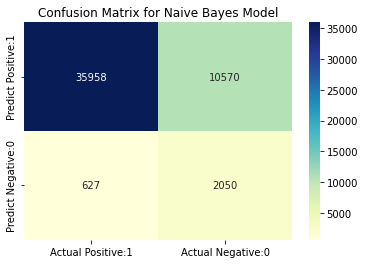

In [157]:
# visualize confusion matrix with seaborn heatmap

gnb_cm_matrix = pd.DataFrame(data=gnb_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(gnb_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

In [158]:
print(metrics.classification_report(y_test, gnb_y_pred))

              precision    recall  f1-score   support

          No       0.98      0.77      0.87     46528
         Yes       0.16      0.77      0.27      2677

    accuracy                           0.77     49205
   macro avg       0.57      0.77      0.57     49205
weighted avg       0.94      0.77      0.83     49205



# Model 3: Random Forest Algoritm

In [180]:
# modelling
from sklearn.ensemble import RandomForestClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [162]:
rf_y_pred = rf.predict(X_test)

## Accuracy score

In [163]:
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

Accuracy: 0.9450259120008129


## Compare the train-set and test-set accuracy

In [164]:
rf_y_pred_train = rf.predict(X_train)
rf_y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [165]:
print('Training-set accuracy score:', metrics.accuracy_score(y_train, rf_y_pred_train))

Training-set accuracy score: 1.0


## Check for overfitting and underfitting

In [167]:
# print the scores on training and test set

print('Training set score:', rf.score(X_train, y_train))
print('Test set score:', rf.score(X_test, y_test))

Training set score: 1.0
Test set score: 0.9450259120008129


The values are similar, but the test set score is still lower than the training set score.

## Compare RF model accuracy with null accuracy

In [168]:
y_test.value_counts()

No     46528
Yes     2677
Name: HadHeartAttack, dtype: int64

In [169]:
# check null accuracy score

null_accuracy = (46528/(46528+2677))
print('Null accuracy score:', (null_accuracy))

Null accuracy score: 0.9455949598618026


In our rf model, the null accuracy score is MIRIP GATAU ARTINYS than the accuracy score.

## Confusion Matrix

In [173]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

print('Confusion matrix\n\n', rf_cm)
print('\nTrue Positives(TP) =', rf_cm[0,0])
print('True Negatives(TN) =', rf_cm[1,1])
print('False Positives(FP) =', rf_cm[0,1])
print('False Negatives(FN) =', rf_cm[1,0])

Confusion matrix

 [[45523  1005]
 [ 1700   977]]

True Positives(TP) = 45523
True Negatives(TN) = 977
False Positives(FP) = 1005
False Negatives(FN) = 1700


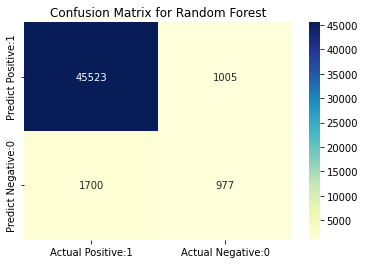

In [174]:
# visualize confusion matrix with seaborn heatmap

rf_cm_matrix = pd.DataFrame(data=rf_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(rf_cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Laporan Klasifikasi

In [175]:
print(metrics.classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97     46528
         Yes       0.49      0.36      0.42      2677

    accuracy                           0.95     49205
   macro avg       0.73      0.67      0.70     49205
weighted avg       0.94      0.95      0.94     49205

